<a href="https://colab.research.google.com/github/takahiromiura/class_data_analysis_I/blob/main/notebooks/generation_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 生成 AI による失敗例

>注意: 以下のコードは、2024/6/25 に Gemini を用いて作成しました。別の日に行った場合は、再現できない可能性があります。
> 命令文 (プロンプト) はコードセルの最初にコメントアウトされている部分です。

生成 AI の発展は著しく、簡単な分析であればコードを書かずにできるようになりました。
しかし、まだできない部分もあります。
例えば、回帰分析の結果をグラフにして、レポートにまとめたいとしましょう。

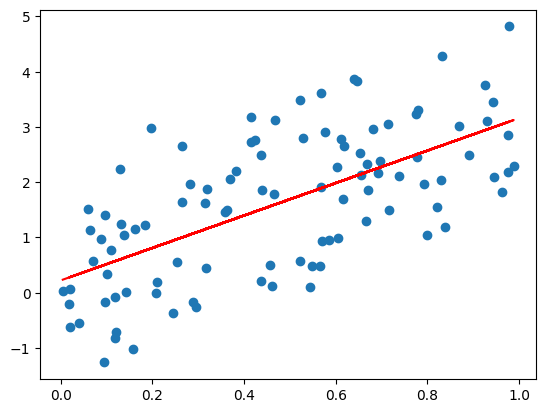

In [ ]:
# prompt: 単回帰を行うためのデータ y, x を作成して。
# また、データの散布図に回帰線を描画してください。

import numpy as np
import matplotlib.pyplot as plt

# Create data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 3 * x + np.random.randn(100, 1)

# Fit linear regression model
model = np.polyfit(x.flatten(), y.flatten(), 1)
predict = np.poly1d(model)

# Plot data and regression line
plt.scatter(x, y)
plt.plot(x, predict(x), color='r')
plt.show()


大まかには良いかと思いますが、少し説明が足りません。

x 軸、y 軸が何かわかりませんし、タイトルもないので何の図か分かりません。

色も少しきついです。

標準誤差から計算した信頼区間もつけたいです。

修正するプロンプトを出してみます。

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22259 (\N{CJK UNIFIED IDEOGRAPH-56F3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

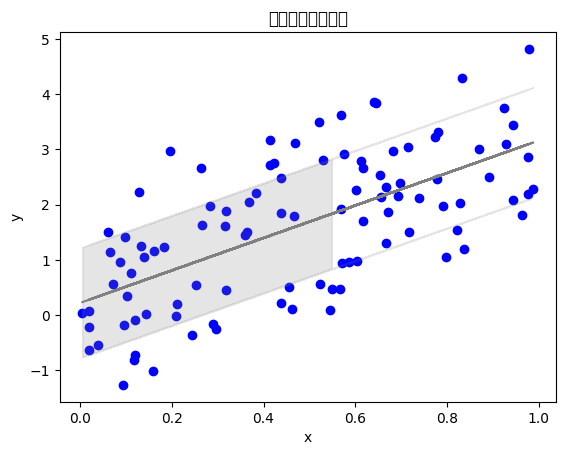

In [ ]:
# prompt: 説明を日本語にしてください。
# また、色がきついので変えてください。
# 標準誤差もグラフにつけてください。

import numpy as np
import matplotlib.pyplot as plt

# データの作成
np.random.seed(0)
x = np.random.rand(100, 1)
y = 3 * x + np.random.randn(100, 1)

# 線形回帰モデルの当てはめ
model = np.polyfit(x.flatten(), y.flatten(), 1)
predict = np.poly1d(model)

# データと回帰直線のプロット
plt.scatter(x, y, color="blue")
plt.plot(x, predict(x), color="gray")

# 標準誤差の計算
std_error = np.std(y - predict(x))

# 標準誤差のグラフへの追加
# predict(x)を1次元配列に変換
plt.fill_between(x.flatten(), predict(x.flatten()) - std_error, predict(x.flatten()) + std_error, alpha=0.2, color="gray")

# グラフの表示
plt.xlabel("x")
plt.ylabel("y")
plt.title("散布図と回帰直線")
plt.show()

x 軸、y 軸のラベルは追加されましたが、タイトル (散布図と回帰直線) は文字化けしてしまっています。

また、信頼区間のエリアの色も途中で止まってしまい、変な図になっています。

再度、修正を依頼します。

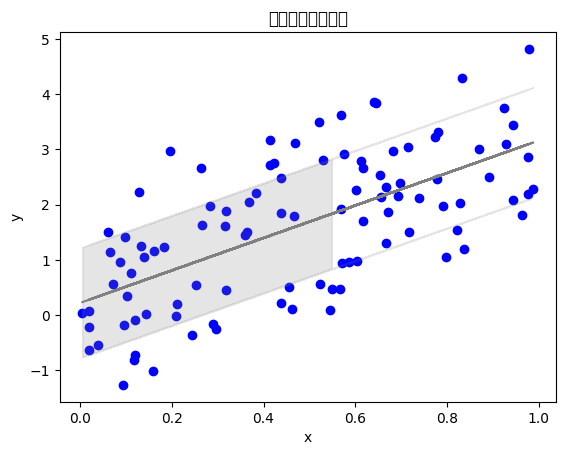

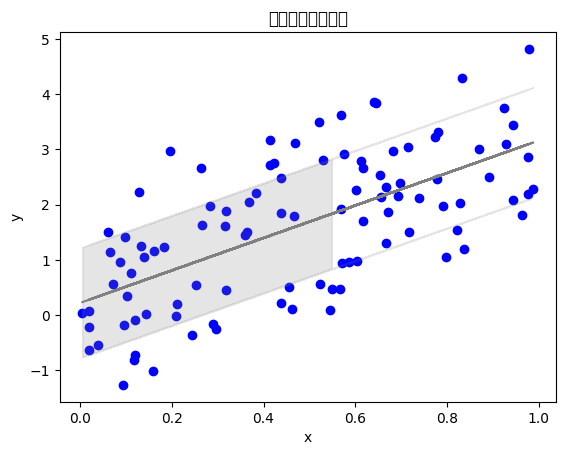

In [ ]:
# prompt: 日本語が文字化けしています。
# また、信頼区間の色が途中までしか描画されていません。

import numpy as np
import matplotlib.pyplot as plt


# Create data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 3 * x + np.random.randn(100, 1)

# Fit linear regression model
model = np.polyfit(x.flatten(), y.flatten(), 1)
predict = np.poly1d(model)

# Plot data and regression line
plt.scatter(x, y, color="blue")
plt.plot(x, predict(x), color="gray")

# Calculate standard error
std_error = np.std(y - predict(x))

# Add confidence interval to the plot
# Convert predict(x) to a 1-dimensional array
plt.fill_between(x.flatten(), predict(x.flatten()) - std_error, predict(x.flatten()) + std_error, alpha=0.2, color="gray")

# Show the plot
plt.xlabel("x")
plt.ylabel("y")
plt.title("散布図と回帰直線")
plt.show()

# Set the font to Japanese
plt.rcParams['font.family'] = 'IPAPGothic'

# Redraw the plot
plt.scatter(x, y, color="blue")
plt.plot(x, predict(x), color="gray")
plt.fill_between(x.flatten(), predict(x.flatten()) - std_error, predict(x.flatten()) + std_error, alpha=0.2, color="gray")
plt.xlabel("x")
plt.ylabel("y")
plt.title("散布図と回帰直線")
plt.show()


図が 2 個でてきてしまいました。

しかし、修正はされていません。

残念ながら、現状では日本語の図を作ることはそう簡単ではありません。

一体なぜ問題が起きているのか？

これを推測できることが、問題解決の近道です。

そして、推測するための力をつけるには、プログラミングを勉強する必要があります。